same scenario like polynomial linear regression but with svr

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Position_Salaries.csv')
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
y = y.reshape(len(y),1)

In [6]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [8]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [9]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [10]:
from sklearn.svm import SVR
regressor = SVR(kernel= 'rbf')
regressor.fit(X, y)

/opt/homebrew/anaconda3/envs/kerasenv/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [11]:
y_pred = regressor.predict(sc_X.transform([[6.5]]))

In [12]:
y_pred = sc_y.inverse_transform([y_pred])

In [13]:
print(y_pred)

[[170370.0204065]]


In [14]:
y_svr_pred = regressor.predict(X)

In [15]:
y_svr_pred = sc_y.inverse_transform([y_svr_pred])
y = sc_y.inverse_transform(y)
X - sc_X.inverse_transform(X)

array([[-2.5666989 ],
       [-3.21854359],
       [-3.87038828],
       [-4.52223297],
       [-5.17407766],
       [-5.82592234],
       [-6.47776703],
       [-7.12961172],
       [-7.78145641],
       [-8.4333011 ]])

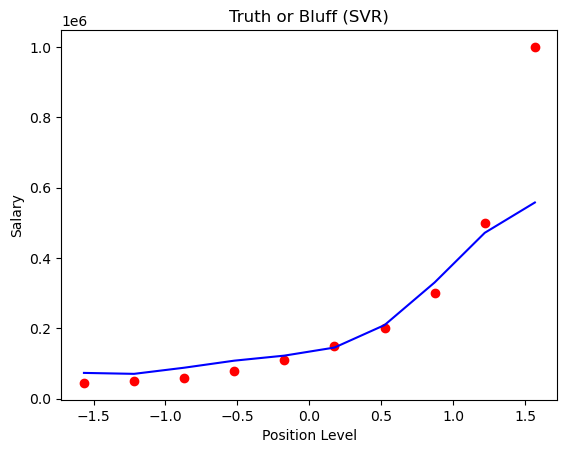

In [16]:
y_svr_pred = y_svr_pred.reshape(-1, 1)
plt.scatter(X, y, color="red")
plt.plot(X, y_svr_pred, c="blue")
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()